<a href="https://colab.research.google.com/github/cschellenberger/Analysis-Fundamentals/blob/master/DinnerWithTheBoss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Stakeholder Analysis

In [0]:
plt.rcParams['figure.figsize'] = (14, 8)
plt.style.use('seaborn-whitegrid')

In [0]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [0]:
stakeholders = pd.read_csv("https://schellenbergers3bucket.s3-us-west-2.amazonaws.com/DinnerWithTheBoss_Stakeholders+-+Sheet1.csv")

In [0]:
stakeholders.head()

,ID,Stakeholder,Needs,Influence,Importance,Influence (1-5),Importance (1-5)
0,1,Weaver,Impress boss; Have a unique dinner party; Keep...,Validate and select the solutions presented by...,Weaver is central to the success of the dinner...,5,3
1,2,Boss,Attend the dinner party; Have clear communicat...,The boss needs to attend to have a successful ...,Almost every need that we can identify for the...,2,5
2,3,Me,Gather information related to the guests and t...,"Provide adequate, logical, and reasonable anal...","If our needs are not met, the guests could sti...",4,1
3,4,Other guests (IT Leadership),Attend the dinner party; Have clear communicat...,The guests need to attend to have a successful...,Almost every need we can identify for the gues...,2,4
4,5,KEG Waitress/Waiter (status quo),Tips from regular customers; Accurate informat...,The waiter/waitress is essential as the interf...,"If they do a good job, it is important that We...",3,2


In [0]:
influence = np.array(stakeholders.iloc[:,5])
importance = np.array(stakeholders.iloc[:,6])

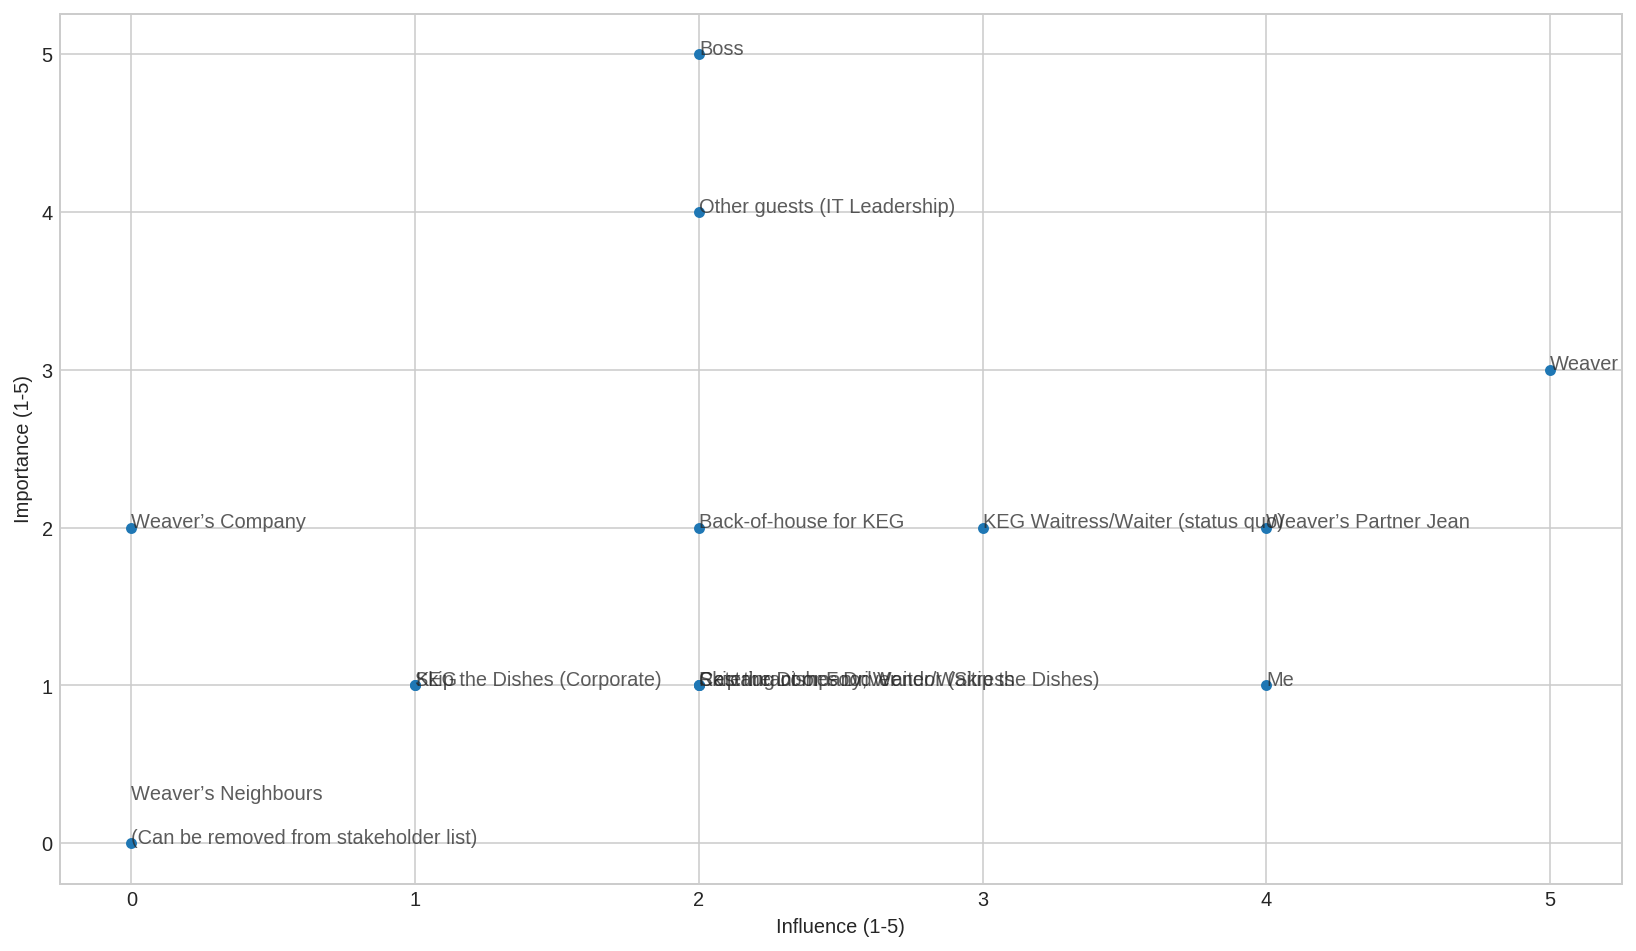

In [0]:
stakeholders.plot(x="Influence (1-5)", y="Importance (1-5)", kind='scatter', figsize=(14,8))
for x, y, label in zip(np.array(stakeholders.iloc[:,5]), np.array(stakeholders.iloc[:,6]), np.array(stakeholders.iloc[:,1])):
    plt.annotate(label, (x, y), fontsize=10, alpha=0.75)

# Data Analysis

## Conditional Variables
### Number of Guests
The number of guests could change based on scheduling issues or the parameters of the dinner plans. By assigning this variable early, the number of guests can be changed and it will provide new costs within the function output.

In [0]:
number_of_guests = 8

## Raw Data
This data is taken from the case study directly. The data is clustered by solution (KEG, Catering, Cooking, and Delivery).

In [0]:
keg_steak_shrimp = 32.95
keg_salad = 13.49
keg_dessert = 6.50
keg_wine = 8.50

catering_dinner = 16.99
catering_service = 60.00
catering_plating = 6.00

# wine is added to catering, cooking, and delivery scenarios
wine_low = 9.75
wine_mid = 18.99
wine_high = 49.99

cooking_steak_16oz = 29.99
cooking_shrimp_60_70 = 12.97 # highest cost scenario is if there are 60/pack
cooking_salad_4_servings = 8.95
cooking_cake_16_servings = 22.95

print("assumption: One serving of shrimp is 5 shrimp")

skip_steak = 10.49
skip_salad_4_servings = 8.99
skip_dessert = 4.99
skip_delivery = 8.00

assumption: One serving of shrimp is 5 shrimp


## Conversions
These calculations adjust the units of various data points to ensure that calculations are relevant and accurate. The standard communication unit in this analysis will be the **serving**.

In [0]:
ounces_to_millimeters = 29.574

bottle_ounces = 750 / ounces_to_millimeters
print("Number of ounces per bottle: ", round(bottle_ounces, 2))

servings_per_bottle = bottle_ounces / 6  # 6oz serving size
print("Number of wine servings per bottle: ", round(servings_per_bottle, 2))

Number of ounces per bottle:  25.36
Number of wine servings per bottle:  4.23


## KEG Restaurant Solution

In [0]:
keg_serving_price = (keg_steak_shrimp +
                    keg_salad +
                    keg_dessert +
                    keg_wine)

print("The KEG serving price is:\n\n", "$", 
      round(keg_serving_price, 2), sep="")
print("The KEG serving price with 18% gratuity is:\n\n",
      "$", round(keg_serving_price * 1.18, 2), sep="")

The KEG serving price is:

$61.44
The KEG serving price with 18% gratuity is:

$72.5


## Catering Solution

In [0]:
catering_serving_price = (catering_dinner +
                         (catering_service / number_of_guests) +
                         catering_plating)

print("The catering serving price is:\n")

for quality, price in [("low quality", wine_low), 
                       ("mid quality", wine_mid), 
                       ("high quality", wine_high)]:

	wine_cost = price / servings_per_bottle

	print(quality, " wine: \n$", 
       round(catering_serving_price + wine_cost, 2), sep="")

The catering serving price is:

low quality wine: 
$32.8
mid quality wine: 
$34.98
high quality wine: 
$42.32


## Cooking at Home Solution

In [0]:
cooking_steak_serving_number = 16 / 6  # 6oz serving size
print("number of servings from one 16oz steak,", 
      round(cooking_steak_serving_number, 2))

print("assumption: The butcher can prepare 6oz steaks")

number of servings from one 16oz steak, 2.67
assumption: The butcher can prepare 6oz steaks


In [0]:
cooking_steak_price = cooking_steak_16oz / cooking_steak_serving_number
print("Cooking steak serving price is, ", "$", 
      round(cooking_steak_price, 2), sep="")

Cooking steak serving price is, $11.25


In [0]:
cooking_shrimp_serving_number = 60 / 5  # 5 shrimp serving size
print("number of servings from one shrimp package is at minimum,", 
      round(cooking_shrimp_serving_number, 2))

number of servings from one shrimp package is at minimum, 12.0


In [0]:
leftover_shrimp = (cooking_shrimp_serving_number - number_of_guests) * 5

print("assumption: The number of leftover shrimp is approximately, ", 
      leftover_shrimp)

assumption: The number of leftover shrimp is approximately,  20.0


In [0]:
cooking_shrimp_price = cooking_shrimp_60_70 / cooking_shrimp_serving_number
print("Cooking shrimp serving price is, ", "$", 
      round(cooking_shrimp_price, 2), sep="")

Cooking shrimp serving price is, $1.08


In [0]:
cooking_serving_price = (cooking_steak_price + 
                         cooking_shrimp_price + 
                         (cooking_salad_4_servings/4) + 
                         (cooking_cake_16_servings/16))
print("Cooking at home scenarios: \n\n")
for quality, price in [("low quality", wine_low), 
                       ("mid quality", wine_mid), 
                       ("high quality", wine_high)]:

	wine_cost = price / servings_per_bottle

	print(quality, " wine: \n$", 
       round(cooking_serving_price + wine_cost, 2), sep="")
 
print("\n\nCooking at home serving price is, ", "$", 
      round(cooking_serving_price, 2))

print("\nassumptions: Weaver can cook, \
has cooking supplies, and has generic ingredients. \
\nThere is up to a $36.00 fixed cost for shrimp \
and cake if less than 16 people attend")

Cooking at home scenarios: 


low quality wine: 
$18.31
mid quality wine: 
$20.49
high quality wine: 
$27.83


Cooking at home serving price is,  $ 16.0

assumptions: Weaver can cook, has cooking supplies, and has generic ingredients. 
There is up to a $36.00 fixed cost for shrimp and cake if less than 16 people attend


## Delivery Solution

In [0]:
delivery_serving_price = (skip_steak + 
                          (skip_salad_4_servings/4) + 
                          skip_dessert)

print("Delivery scenarios: \n\n")
for quality, price in [("low quality", wine_low), 
                       ("mid quality", wine_mid), 
                       ("high quality", wine_high)]:

	wine_cost = price / servings_per_bottle

	print(quality, " wine: \n$", 
       round(delivery_serving_price + wine_cost, 2), sep="")
 
print("\n\nDelivery serving price is, ", "$", 
      round(delivery_serving_price, 2), sep="")

Delivery scenarios: 


low quality wine: 
$20.03
mid quality wine: 
$22.22
high quality wine: 
$29.55


Delivery serving price is, $17.73


In [0]:
delivery_withTip_price = delivery_serving_price * 1.15

print("Delivery with 15% gratuity scenarios: \n\n")
for quality, price in [("low quality", wine_low), 
                       ("mid quality", wine_mid), 
                       ("high quality", wine_high)]:

	wine_cost = price / servings_per_bottle

	print(quality, " wine: \n$", 
       round(delivery_withTip_price + wine_cost, 2), sep="")

print("\n\nDelivery serving price with 15% gratuity is, ", "$", 
      round(delivery_withTip_price, 2), sep="")

print("\nassumptions: There is no shrimp in this scenario. \
\n Delivery drivers who do not recieve tips, struggle to make a living.")

Delivery with 15% gratuity scenarios: 


low quality wine: 
$22.69
mid quality wine: 
$24.88
high quality wine: 
$32.21


Delivery serving price with 15% gratuity is, $20.39

assumptions: There is no shrimp in this scenario. 
 Delivery drivers who do not recieve tips, struggle to make a living.
